# Load data

In [282]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom python")
from silvhua import *
import numpy as np
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\src")
from midterm_functions import *

In [283]:
train = load_csv2(r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data',
    'train_for_model_2022-10-29_1606.csv', column1_as_index=True
)

In [480]:
train.shape

(102581, 47)

In [284]:
test = load_csv2(r'C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\data\raw',
    'test_flights.csv', column1_as_index=True)

In [285]:
print(test.shape)
test.columns.value_counts().sort_values(ascending=False)

(660556, 20)


fl_date               1
mkt_unique_carrier    1
branded_code_share    1
mkt_carrier           1
mkt_carrier_fl_num    1
op_unique_carrier     1
tail_num              1
op_carrier_fl_num     1
origin_airport_id     1
origin                1
origin_city_name      1
dest_airport_id       1
dest                  1
dest_city_name        1
crs_dep_time          1
crs_arr_time          1
dup                   1
crs_elapsed_time      1
flights               1
distance              1
dtype: int64

# Feature engineering

In [286]:
test.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

#### Group states into four regions


In [287]:
regions = {
    'WA': 'West',
    'OR': 'West',
    'ID': 'West',
    'MT': 'West',
    'WY': 'West',
    'CA': 'West',
    'NV': 'West',
    'UT': 'West',
    'AZ': 'West',
    'CO': 'West',
    'NM': 'West',
    'HI': 'West',
    'AK': 'West',
    
    'ND': 'Midwest',
    'SD': 'Midwest',
    'NE': 'Midwest',
    'KS': 'Midwest',
    'MN': 'Midwest',
    'IA': 'Midwest',
    'MO': 'Midwest',
    'WI': 'Midwest',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'MI': 'Midwest',
    'OH': 'Midwest',

    'OK': 'South',
    'TX': 'South',
    'AR': 'South',
    'LA': 'South',
    'MS': 'South',
    'AL': 'South',
    'TN': 'South',
    'KY': 'South',
    'WV': 'South',
    'DC': 'South',
    'VA': 'South',
    'DE': 'South',
    'MD': 'South',
    'NC': 'South',
    'SC': 'South',
    'GA': 'South',
    'FL': 'South',

    'PA': 'Northeast',
    'NY': 'Northeast',
    'VT': 'Northeast',
    'ME': 'Northeast',
    'NH': 'Northeast',
    'MA': 'Northeast',
    'CT': 'Northeast',
    'RI': 'Northeast',
    'NJ': 'Northeast'
    }

In [288]:
# Split City and State 
test[['origin_city', 'origin_state']] = test['origin_city_name'].str.split(", ",expand=True,) 
test[['dest_city', 'dest_state']] = test['dest_city_name'].str.split(", ",expand=True,) 

In [289]:
test=test.replace({"origin_state": regions})
test=test.replace({"dest_state": regions})

In [290]:
test = test.rename(columns={'origin_state': 'origin_region', 'dest_state': 'dest_region'})

In [291]:
test.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'origin_city', 'origin_region', 'dest_city', 'dest_region'],
      dtype='object')

In [292]:
test_columns_to_drop = [
    'mkt_unique_carrier', 
'branded_code_share', 
'op_unique_carrier', 
'tail_num', 
'op_carrier_fl_num', 
'origin_city_name', 
'dest_city_name', 
'dup', 
'flights', 
]
test.drop(columns=test_columns_to_drop, inplace=True)
test.columns

Index(['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'origin_airport_id',
       'origin', 'dest_airport_id', 'dest', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'origin_city', 'origin_region',
       'dest_city', 'dest_region'],
      dtype='object')

In [293]:
    # CONVERT crs_dep_time TO DATETIME OBJECT
column = 'crs_dep_time'
test = time_columns(test,column,format='%H%M',fillna=1,dropna=True)

In [294]:
    # To flights table, add columns with the  features for date and forecasting date
test = date_forecast_columns(test,date_column='fl_date',format='%Y-%m-%d')
test.columns

Index(['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'origin_airport_id',
       'origin', 'dest_airport_id', 'dest', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'origin_city', 'origin_region',
       'dest_city', 'dest_region', 'crs_dep_time_dt', 'crs_dep_time_hour',
       'fl_date_dt', 'year', 'month', 'day_of_week', 'day_of_year',
       'fl_date_year_month', 'fl_date_Monday_of_week', 'fl_date_week_number',
       'fl_date_t-1_week_week_number', 'fl_date_t-1_week_date',
       'fl_date_t-1_year_year', 'fl_date_t-1_year_month',
       'fl_date_t-1_year_day'],
      dtype='object')

In [295]:
# remove the _x in column names of train data
train.rename(columns=lambda s: s.replace("_x", ""), inplace=True)

columns_to_add = list(set(train.columns) - set(test.columns))
sorted(columns_to_add)

['arr_delay',
 'arr_hrs_ctg_Afternoon',
 'arr_hrs_ctg_Evening',
 'arr_hrs_ctg_Morning',
 'arr_hrs_ctg_Night',
 'day_of_week_Friday',
 'day_of_week_Monday',
 'day_of_week_Saturday',
 'day_of_week_Sunday',
 'day_of_week_Thursday',
 'day_of_week_Tuesday',
 'day_of_week_Wednesday',
 'dep_delay',
 'dep_hrs_ctg_Afternoon',
 'dep_hrs_ctg_Evening',
 'dep_hrs_ctg_Morning',
 'dep_hrs_ctg_Night',
 'dest_region_Midwest',
 'dest_region_Northeast',
 'dest_region_South',
 'dest_region_West',
 'haul_length_long',
 'haul_length_medium',
 'haul_length_short',
 'mean_arr_delay_carrier_origin_date_t-1_year_month',
 'mean_arr_delay_carrier_origin_month',
 'mean_dep_delay_carrier_origin_date_t-1_year_month',
 'mean_dep_delay_carrier_origin_month',
 'mean_empty_seats_per_departure',
 'mean_freight_per_departure',
 'mean_mail_per_departure',
 'mean_passengers_per_departure',
 'mean_payload_per_departure',
 'mean_seats_per_departure',
 'origin_region_Midwest',
 'origin_region_Northeast',
 'origin_region_South'

In [296]:
  # Replace day numbers with day names
test['day_of_week'].replace({ 
        0: 'Monday', 
        1: 'Tuesday', 
        2: 'Wednesday', 
        3: 'Thursday', 
        4: 'Friday', 
        5: 'Saturday', 
        6: 'Sunday'}, inplace=True)
      

In [297]:
# Divide the flight into short, medium, and long haul flights based on air-time
# SH 2022-10-28 8:55: 'air_time' not available in test data, so use crs_elapsed_time instead.
length=[]

for i in test['crs_elapsed_time']:
    if i < (180): # less than 3 hours
        length.append('short')
    elif (i >= (180)) and (i <= (360)): #between 3 and 6 hours
        length.append('medium')
    else: length.append('long') # more than 6 hours

test['haul_length'] = length  

In [298]:
# Converting time into 24 hours
test['crs_arr_hrs'] = (test['crs_arr_time']/100).astype(int)
test['crs_dep_hrs'] = (test['crs_dep_time']/100).astype(int)

# Convert time into categories: crs_dep_hrs
ctg = []
for i in test['crs_dep_hrs']:
    if (i>=5) and (i<12):
        ctg.append('Morning')
    elif (i>=12) and (i<16):
        ctg.append('Afternoon')
    elif (i>=16) and (i<=22):
        ctg.append('Evening')
    elif (i>22) or (i<5):
        ctg.append('Night')

test['dep_hrs_ctg'] = ctg

# Convert time into categories: crs_arr_hrs
ctg = []
for i in test['crs_arr_hrs']:
    if (i>=5) and (i<12):
        ctg.append('Morning')
    elif (i>=12) and (i<16):
        ctg.append('Afternoon')
    elif (i>=16) and (i<=22):
        ctg.append('Evening')
    elif (i>22) or (i<5):
        ctg.append('Night')
test['arr_hrs_ctg'] = ctg


In [299]:
# Add columns to test data to allow for concatenation
# columns_to_add = list(set(train.columns) - set(test.columns))
# columns_to_add
# test[columns_to_add] = np.nan
# test.head()

In [300]:
# Fill in mean passenger data with the same value for the given 'mkt_carrier','origin_airport_id', 'dest_airport_id'
def fill_history(test,train,column):
    """
    test: df to fill.
    train: df values used to fill other df.
    
    """
    
    mean = train.loc[:,column].mean()
    test.loc[:,column] = mean

    return test

left_join_columns = ['mkt_carrier','origin_airport_id', 'dest_airport_id', 'month']
right_join_columns = ['carrier','origin_airport_id', 'dest_airport_id', 'month'] 

delay_to_fill = [
#  'mean_arr_delay_carrier_origin_datet-1_year_week',
 'mean_dep_delay_carrier_origin_month',
 'mean_dep_delay_carrier_origin_date_t-1_year_month',
 'mean_arr_delay_carrier_origin_month',
#  'mean_dep_delay_carrier_origin_date_t-1_year_week', # does not exist in train data set
 'mean_arr_delay_carrier_origin_date_t-1_year_month',
 ]
delay_data_to_drop = [
 'mean_arr_delay_carrier_origin_date_t-1_week_week_number',
 'mean_dep_delay_carrier_origin_date_t-1_week',
 'mean_arr_delay_carrier_origin_date_t-1_week',
 'mean_dep_delay_carrier_origin_date_t-1_week_week_number',
 'mean_arr_delay_carrier_origin_week',
 'mean_dep_delay_carrier_origin_date',
 'mean_dep_delay_carrier_origin_week',
 'mean_arr_delay_carrier_origin_date',
]

In [301]:
for column in delay_to_fill:
    test = test.groupby(left_join_columns, group_keys=False).apply(lambda x: fill_history(x, train, column))

In [302]:
test[delay_to_fill]

,mean_dep_delay_carrier_origin_month,mean_dep_delay_carrier_origin_date_t-1_year_month,mean_arr_delay_carrier_origin_month,mean_arr_delay_carrier_origin_date_t-1_year_month
0,12.618681,12.618681,5.992047,5.992047
1,12.618681,12.618681,5.992047,5.992047
2,12.618681,12.618681,5.992047,5.992047
3,12.618681,12.618681,5.992047,5.992047
4,12.618681,12.618681,5.992047,5.992047
...,...,...,...,...
660551,12.618681,12.618681,5.992047,5.992047
660552,12.618681,12.618681,5.992047,5.992047
660553,12.618681,12.618681,5.992047,5.992047
660554,12.618681,12.618681,5.992047,5.992047


In [303]:
# FLIGHTS TABLE TRAINING DATA: Fill mean flight historical/forecasting delay data. 
dict = {
    # 'mean_dep_delay_carrier_origin_date_t-1_week': 'mean_dep_delay_carrier_origin_week', 
    # 'mean_arr_delay_carrier_origin_date_t-1_week': 'mean_arr_delay_carrier_origin_week',
    # 'mean_dep_delay_carrier_origin_date_t-1_week_week_number': 'mean_dep_delay_carrier_origin_week',
    # 'mean_arr_delay_carrier_origin_date_t-1_week_week_number': 'mean_arr_delay_carrier_origin_week',
    # 'mean_dep_delay_carrier_origin_datet-1_year_week': 'mean_dep_delay_carrier_origin_week', # DON'T USE THIS FOR NOW
    # 'mean_arr_delay_carrier_origin_datet-1_year_week': 'mean_arr_delay_carrier_origin_week', # DON'T USE THIS FOR NOW
    'mean_dep_delay_carrier_origin_date_t-1_year_month': 'mean_dep_delay_carrier_origin_month', # DON'T USE THIS FOR NOW
    'mean_arr_delay_carrier_origin_date_t-1_year_month': 'mean_arr_delay_carrier_origin_month' # DON'T USE THIS FOR NOW
}
fill_missing(test,dict,fill_w_mean=False) # Call the function
# explore(test.filter(regex='mean')) # Recheck missing values

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,...,fl_date_t-1_year_day,haul_length,crs_arr_hrs,crs_dep_hrs,dep_hrs_ctg,arr_hrs_ctg,mean_dep_delay_carrier_origin_month,mean_dep_delay_carrier_origin_date_t-1_year_month,mean_arr_delay_carrier_origin_month,mean_arr_delay_carrier_origin_date_t-1_year_month
0,2020-01-01,WN,5888,13891,ONT,14771,SFO,1810,1945,95,...,2019-01-01,short,19,18,Evening,Evening,12.618681,12.618681,5.992047,5.992047
1,2020-01-01,WN,6276,13891,ONT,14771,SFO,1150,1320,90,...,2019-01-01,short,13,11,Morning,Afternoon,12.618681,12.618681,5.992047,5.992047
2,2020-01-01,WN,4598,13891,ONT,14831,SJC,2020,2130,70,...,2019-01-01,short,21,20,Evening,Evening,12.618681,12.618681,5.992047,5.992047
3,2020-01-01,WN,4761,13891,ONT,14831,SJC,1340,1455,75,...,2019-01-01,short,14,13,Afternoon,Afternoon,12.618681,12.618681,5.992047,5.992047
4,2020-01-01,WN,5162,13891,ONT,14831,SJC,915,1035,80,...,2019-01-01,short,10,9,Morning,Morning,12.618681,12.618681,5.992047,5.992047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660551,2020-01-31,DL,4954,11278,DCA,11193,CVG,1859,2041,102,...,2019-01-31,short,20,18,Evening,Evening,12.618681,12.618681,5.992047,5.992047
660552,2020-01-31,DL,4955,11278,DCA,11193,CVG,1515,1702,107,...,2019-01-31,short,17,15,Afternoon,Evening,12.618681,12.618681,5.992047,5.992047
660553,2020-01-31,DL,4956,12478,JFK,10785,BTV,2205,2337,92,...,2019-01-31,short,23,22,Evening,Night,12.618681,12.618681,5.992047,5.992047
660554,2020-01-31,DL,4957,13930,ORD,12478,JFK,1035,1356,141,...,2019-01-31,short,13,10,Morning,Afternoon,12.618681,12.618681,5.992047,5.992047


## Convert categorical data to dummy

In [304]:
test.dtypes[test.dtypes == 'object']

fl_date          object
mkt_carrier      object
origin           object
dest             object
origin_city      object
origin_region    object
dest_city        object
dest_region      object
day_of_week      object
haul_length      object
dep_hrs_ctg      object
arr_hrs_ctg      object
dtype: object

In [540]:
# FLIGHTS TABLE - DUMMY VARIABLES # return here SH 2022-10-29 21:22
dummy = [
    'origin_region',
'dest_region',
'dep_hrs_ctg', 'arr_hrs_ctg',
'day_of_week',
'haul_length',
]
test2 = pd.get_dummies(test,columns=dummy)
test2.columns.value_counts().sort_values(ascending=False)

fl_date                  1
mkt_carrier              1
mkt_carrier_fl_num       1
origin_airport_id        1
origin                   1
                        ..
day_of_week_Tuesday      1
day_of_week_Wednesday    1
haul_length_long         1
haul_length_medium       1
haul_length_short        1
Length: 65, dtype: int64

In [541]:
column_disparity =  list(set(train.columns) - set(test2.columns))
column_disparity 

['arr_delay',
 'mean_freight_per_departure',
 'mean_passengers_per_departure',
 'mean_payload_per_departure',
 'mean_mail_per_departure',
 'mean_empty_seats_per_departure',
 'mean_seats_per_departure',
 'dep_delay']

In [542]:
# Save before merging with passenger data
save_csv(test2, 'test_prepared_', 
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\data',
append_version=True)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/midterm-2022-10-24/data/test_prepared_2022-10-29_2122


## Add passenger data from 2019 to 2020 flights

In [543]:
# Fill in mean passenger data with the same value for the given 'mkt_carrier','origin_airport_id', 'dest_airport_id'
groupby_columns = ['mkt_carrier','origin_airport_id', 'dest_airport_id']
passenger_columns = [
        'mean_payload_per_departure', 'mean_seats_per_departure',
       'mean_passengers_per_departure', 'mean_freight_per_departure',
       'mean_mail_per_departure', 'mean_empty_seats_per_departure']

       # Confirm that passenger columns are the only ones missing in test data
set(column_disparity) - set(passenger_columns)

{'arr_delay', 'dep_delay'}

In [544]:
      # Fill in mean passenger data with the same value for the given 'mkt_carrier','origin_airport_id', 'dest_airport_id'  
for column in passenger_columns:
       test2[column] = train[column]
# explore(test.filter(regex='mean')) # Recheck missing values
list(set(train.columns) - set(test2.columns))

['dep_delay', 'arr_delay']

In [545]:
test2

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,...,day_of_week_Wednesday,haul_length_long,haul_length_medium,haul_length_short,mean_payload_per_departure,mean_seats_per_departure,mean_passengers_per_departure,mean_freight_per_departure,mean_mail_per_departure,mean_empty_seats_per_departure
0,2020-01-01,WN,5888,13891,ONT,14771,SFO,1810,1945,95,...,1,0,0,1,37787.903226,150.0,86.661290,38.669355,1.927419,63.338710
1,2020-01-01,WN,6276,13891,ONT,14771,SFO,1150,1320,90,...,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,WN,4598,13891,ONT,14831,SJC,2020,2130,70,...,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,WN,4761,13891,ONT,14831,SJC,1340,1455,75,...,1,0,0,1,43109.203704,172.5,161.773148,62.703704,1196.560185,10.726852
4,2020-01-01,WN,5162,13891,ONT,14831,SJC,915,1035,80,...,1,0,0,1,36036.250000,140.5,107.704268,5.930894,19.599593,32.795732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660551,2020-01-31,DL,4954,11278,DCA,11193,CVG,1859,2041,102,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
660552,2020-01-31,DL,4955,11278,DCA,11193,CVG,1515,1702,107,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
660553,2020-01-31,DL,4956,12478,JFK,10785,BTV,2205,2337,92,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
660554,2020-01-31,DL,4957,13930,ORD,12478,JFK,1035,1356,141,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [546]:
explore(test2)

Unique IDs: 31. # of rows: 660556. Match: False



,Total,Percent
mean_empty_seats_per_departure,557975,0.844705
mean_mail_per_departure,557975,0.844705
mean_freight_per_departure,557975,0.844705
mean_passengers_per_departure,557975,0.844705
mean_seats_per_departure,557975,0.844705
...,...,...
fl_date_t-1_week_date,0,0.000000
fl_date_t-1_week_week_number,0,0.000000
fl_date_week_number,0,0.000000
fl_date_Monday_of_week,0,0.000000


In [547]:
# Save test data set before dropping rows SH 2022-10-29 18:51
save_csv(test2, 'test_prepared_', 
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\data',
append_version=True)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/midterm-2022-10-24/data/test_prepared_2022-10-29_2123


In [548]:
# Drop rows with missing values from the passengers table
columns_to_check_nulls = [
    'mean_empty_seats_per_departure'
    ]

test3 = test2.dropna(subset=columns_to_check_nulls)
print(test3.shape)
explore(test3)

(102581, 71)
Unique IDs: 14. # of rows: 102581. Match: False



,Total,Percent
fl_date,0,0.0
dest_region_VI,0,0.0
arr_hrs_ctg_Afternoon,0,0.0
dep_hrs_ctg_Night,0,0.0
dep_hrs_ctg_Morning,0,0.0
...,...,...
fl_date_t-1_week_date,0,0.0
fl_date_t-1_week_week_number,0,0.0
fl_date_week_number,0,0.0
fl_date_Monday_of_week,0,0.0


In [549]:
# Create list with the columns to be scaled.
numeric_cols = [
'arr_delay', 'crs_elapsed_time', 'distance',
'mean_payload_per_departure', 'mean_seats_per_departure', 'mean_passengers_per_departure', 
'mean_freight_per_departure', 'mean_mail_per_departure', 'mean_empty_seats_per_departure',

'mean_dep_delay_carrier_origin_month', 'mean_arr_delay_carrier_origin_month', 
'mean_dep_delay_carrier_origin_week', 'mean_arr_delay_carrier_origin_week', 
'mean_dep_delay_carrier_origin_date', 'mean_arr_delay_carrier_origin_date', 
'mean_dep_delay_carrier_origin_date_t-1_week', 'mean_arr_delay_carrier_origin_date_t-1_week', 
'mean_dep_delay_carrier_origin_date_t-1_week_week_number', 
'mean_arr_delay_carrier_origin_date_t-1_week_week_number', 
'mean_dep_delay_carrier_origin_datet-1_year_week', 
'mean_arr_delay_carrier_origin_datet-1_year_week', 
'mean_dep_delay_carrier_origin_date_t-1_year_month', 
'mean_arr_delay_carrier_origin_date_t-1_year_month'
]
outcomes = ['arr_delay']

# Create a list with the dummy/categorical variables:
cat_cols = [
'origin_region_Midwest', 'origin_region_Northeast',
'origin_region_South', 'origin_region_West', 'dest_region_Midwest',
'dest_region_Northeast', 'dest_region_South', 'dest_region_West',

'arr_hrs_ctg_Afternoon', 'arr_hrs_ctg_Evening', 'arr_hrs_ctg_Morning',
'arr_hrs_ctg_Night', 

'dep_hrs_ctg_Afternoon', 'dep_hrs_ctg_Evening', 'dep_hrs_ctg_Morning', 
'dep_hrs_ctg_Night',

'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 
'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 
'day_of_week_Wednesday',

'haul_length_long', 'haul_length_medium', 'haul_length_short'
]

columns_for_ID = [
'fl_date',
 'mkt_carrier',
 'mkt_carrier_fl_num','origin_airport_id', 'dest_airport_id']

In [550]:
test3.columns.value_counts().sort_values(ascending=False)

fl_date                           1
month                             1
mkt_carrier_fl_num                1
origin_airport_id                 1
origin                            1
                                 ..
mean_seats_per_departure          1
mean_passengers_per_departure     1
mean_freight_per_departure        1
mean_mail_per_departure           1
mean_empty_seats_per_departure    1
Length: 71, dtype: int64

In [551]:
# columns to remove from test set
check = list(set(test3.columns) - set(cat_cols) - set(numeric_cols) - set(columns_for_ID))
print('Columns to remove from test set:',check)

Columns to remove from test set: ['fl_date_dt', 'fl_date_year_month', 'crs_arr_hrs', 'crs_dep_time', 'month', 'dest_city', 'crs_dep_time_dt', 'fl_date_Monday_of_week', 'origin_city', 'fl_date_week_number', 'origin_region_TT', 'dest_region_TT', 'year', 'dest_region_VI', 'crs_dep_hrs', 'fl_date_t-1_week_week_number', 'origin', 'fl_date_t-1_year_day', 'crs_dep_time_hour', 'dest_region_PR', 'crs_arr_time', 'origin_region_VI', 'origin_region_PR', 'fl_date_t-1_week_date', 'dest', 'fl_date_t-1_year_year', 'day_of_year', 'fl_date_t-1_year_month']


In [552]:
check2 = list(set(train.columns) - set(cat_cols) - set(numeric_cols) - set(columns_for_ID) - set(outcomes))
check2

['year', 'month', 'dep_delay']

In [553]:
# Any columns in train data that aren't in test data?
print('Columns in train data that is not in test data',(set(train.columns) - set(test3.columns))) 

# Any columns in test set that still need to be removed?
print(set(test3.columns) - set(train.columns) - set(check))

# Double check
set(check) - set(test3.columns) - set(train.columns)

Columns in train data that is not in test data {'dep_delay', 'arr_delay'}
set()


set()

In [554]:
# Drop columns that aren't needed
column_disparity = check
test3 = test3.drop(columns=column_disparity)
train2 = train.drop(columns=['dep_delay']+check2)
print('Columns in train data that is not in test data',set(train2.columns) - set(test3.columns))

check = list(set(test3.columns) - set(cat_cols) - set(numeric_cols) - set(columns_for_ID))
print('Columns to remove from test set:',check)

Columns in train data that is not in test data {'arr_delay'}
Columns to remove from test set: []


# Select columns for scaling

In [555]:
columns_for_ID =[
'fl_date',
 'mkt_carrier',
 'mkt_carrier_fl_num','origin_airport_id', 'dest_airport_id']
outcomes = ['arr_delay']

# Create list with the columns to be scaled.
numeric_cols = [
    'crs_elapsed_time', 'distance', 'mean_payload_per_departure',
       'mean_seats_per_departure', 'mean_passengers_per_departure',
       'mean_freight_per_departure', 'mean_mail_per_departure',
       'mean_empty_seats_per_departure', 'mean_dep_delay_carrier_origin_month',
       'mean_arr_delay_carrier_origin_month',
       'mean_dep_delay_carrier_origin_date_t-1_year_month',
       'mean_arr_delay_carrier_origin_date_t-1_year_month'
]
# Create a list with the dummy/categorical variables:
cat_cols = [
'origin_region_Midwest', 'origin_region_Northeast',
'origin_region_South', 'origin_region_West', 'dest_region_Midwest',
'dest_region_Northeast', 'dest_region_South', 'dest_region_West',
'arr_hrs_ctg_Afternoon', 'arr_hrs_ctg_Evening', 'arr_hrs_ctg_Morning',
'arr_hrs_ctg_Night', 
'dep_hrs_ctg_Afternoon', 'dep_hrs_ctg_Evening', 'dep_hrs_ctg_Morning', 
'dep_hrs_ctg_Night',
'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 
'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 
'day_of_week_Wednesday',
'haul_length_long', 'haul_length_medium', 'haul_length_short'
]


In [556]:
train2 = train2.set_index(columns_for_ID)
test3 = test3.set_index(columns_for_ID)
test3.columns

Index(['crs_elapsed_time', 'distance', 'mean_dep_delay_carrier_origin_month',
       'mean_dep_delay_carrier_origin_date_t-1_year_month',
       'mean_arr_delay_carrier_origin_month',
       'mean_arr_delay_carrier_origin_date_t-1_year_month',
       'origin_region_Midwest', 'origin_region_Northeast',
       'origin_region_South', 'origin_region_West', 'dest_region_Midwest',
       'dest_region_Northeast', 'dest_region_South', 'dest_region_West',
       'dep_hrs_ctg_Afternoon', 'dep_hrs_ctg_Evening', 'dep_hrs_ctg_Morning',
       'dep_hrs_ctg_Night', 'arr_hrs_ctg_Afternoon', 'arr_hrs_ctg_Evening',
       'arr_hrs_ctg_Morning', 'arr_hrs_ctg_Night', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'haul_length_long', 'haul_length_medium', 'haul_length_short',
       'mean_payload_per_departure', 'mean_seats_per_departure',
       'mean_passengers_per_depar

In [557]:
test3.filter(numeric_cols)

crs_elapsed_time  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                     
2020-01-01 WN          5888               13891             14771                          95   
                       4761               13891             14831                          75   
                       5162               13891             14831                          80   
                       6152               13891             14831                          80   
                       1679               13891             14893                          85   
...                                                                                       ...   
2020-01-14 DL          546                11618             10397                         152   
                       549                10397             14843                         210   
                       550                13487             14492                         160   
                       555                13487             10423                         187   
                       569                10397             13487                         161   

                                                                             distance  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2020-01-01 WN          5888               13891             14771                 363   
                       4761               13891             14831                 333   
                       5162               13891             14831                 333   
                       6152               13891             14831                 333   
                       1679               13891             14893                 390   
...                                                                               ...   
2020-01-14 DL          546                11618             10397                 746   
                       549                10397             14843                1547   
                       550                13487             14492                 980   
                       555                13487             10423                1042   
                       569                10397             13487                 907   

                                                                             mean_payload_per_departure  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                               
2020-01-01 WN          5888               13891             14771                          37787.903226   
                       4761               13891             14831                          43109.203704   
                       5162               13891             14831                          36036.250000   
                       6152               13891             14831                          47580.000000   
                       1679               13891             14893                          45000.000000   
...                                                                                                 ...   
2020-01-14 DL          546                11618             10397                          44943.208648   
                       549                10397             14843                          39000.000000   
                       550                13487             14492                          33883.000000   
                       555                13487             10423                          59997.184344   
                       569                10397             13487                          39000.000000   

                                                                             mean_seats_per_departure  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                             
2020-01-01 WN          5888               13891        

In [558]:
train2.filter(numeric_cols)

crs_elapsed_time  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                     
2019-01-06 AA          324                13930             13198                        87.0   
2019-01-05 UA          467                11042             11292                       209.0   
           DL          5790               14869             14831                       130.0   
2019-01-04 AS          359                12478             14747                       392.0   
2019-01-02 HA          518                12173             12758                        48.0   
...                                                                                       ...   
2019-01-07 AA          256                12892             13930                       256.0   
2019-01-01 WN          2160               11423             15016                        65.0   
2019-01-04 DL          522                14492             11433                       113.0   
2019-01-06 AA          2206               11298             13303                       161.0   
2019-01-04 WN          1553               14107             11292                       105.0   

                                                                             distance  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2019-01-06 AA          324                13930             13198               403.0   
2019-01-05 UA          467                11042             11292              1201.0   
           DL          5790               14869             14831               584.0   
2019-01-04 AS          359                12478             14747              2422.0   
2019-01-02 HA          518                12173             12758               163.0   
...                                                                               ...   
2019-01-07 AA          256                12892             13930              1744.0   
2019-01-01 WN          2160               11423             15016               259.0   
2019-01-04 DL          522                14492             11433               501.0   
2019-01-06 AA          2206               11298             13303              1121.0   
2019-01-04 WN          1553               14107             11292               602.0   

                                                                             mean_payload_per_departure  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                               
2019-01-06 AA          324                13930             13198                          37787.903226   
2019-01-05 UA          467                11042             11292                          43109.203704   
           DL          5790               14869             14831                          36036.250000   
2019-01-04 AS          359                12478             14747                          47580.000000   
2019-01-02 HA          518                12173             12758                          45000.000000   
...                                                                                                 ...   
2019-01-07 AA          256                12892             13930                          44943.208648   
2019-01-01 WN          2160               11423             15016                          39000.000000   
2019-01-04 DL          522                14492             11433                          33883.000000   
2019-01-06 AA          2206               11298             13303                          59997.184344   
2019-01-04 WN          1553               14107             11292                          39000.000000   

                                                                             mean_seats_per_departure  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                             
2019-01-06 AA          324                13930        

In [559]:
test3.filter(numeric_cols).head(1)

,,,,,crs_elapsed_time,distance,mean_payload_per_departure,mean_seats_per_departure,mean_passengers_per_departure,mean_freight_per_departure,mean_mail_per_departure,mean_empty_seats_per_departure,mean_dep_delay_carrier_origin_month,mean_arr_delay_carrier_origin_month,mean_dep_delay_carrier_origin_date_t-1_year_month,mean_arr_delay_carrier_origin_date_t-1_year_month
fl_date,mkt_carrier,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,,,,,,,,,,,,
2020-01-01,WN,5888,13891,14771,95,363,37787.903226,150.0,86.66129,38.669355,1.927419,63.33871,12.618681,5.992047,12.618681,5.992047


In [560]:
train2.filter(cat_cols)

origin_region_Midwest  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                          
2019-01-06 AA          324                13930             13198                                1   
2019-01-05 UA          467                11042             11292                                1   
           DL          5790               14869             14831                                0   
2019-01-04 AS          359                12478             14747                                0   
2019-01-02 HA          518                12173             12758                                0   
...                                                                                            ...   
2019-01-07 AA          256                12892             13930                                0   
2019-01-01 WN          2160               11423             15016                                1   
2019-01-04 DL          522                14492             11433                                0   
2019-01-06 AA          2206               11298             13303                                0   
2019-01-04 WN          1553               14107             11292                                0   

                                                                             origin_region_Northeast  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                            
2019-01-06 AA          324                13930             13198                                  0   
2019-01-05 UA          467                11042             11292                                  0   
           DL          5790               14869             14831                                  0   
2019-01-04 AS          359                12478             14747                                  1   
2019-01-02 HA          518                12173             12758                                  0   
...                                                                                              ...   
2019-01-07 AA          256                12892             13930                                  0   
2019-01-01 WN          2160               11423             15016                                  0   
2019-01-04 DL          522                14492             11433                                  0   
2019-01-06 AA          2206               11298             13303                                  0   
2019-01-04 WN          1553               14107             11292                                  0   

                                                                             origin_region_South  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                        
2019-01-06 AA          324                13930             13198                              0   
2019-01-05 UA          467                11042             11292                              0   
           DL          5790               14869             14831                              0   
2019-01-04 AS          359                12478             14747                              0   
2019-01-02 HA          518                12173             12758                              0   
...                                                                                          ...   
2019-01-07 AA          256                12892             13930                              0   
2019-01-01 WN          2160               11423             15016                              0   
2019-01-04 DL          522                14492             11433                              1   
2019-01-06 AA          2206               11298             13303                              1   
2019-01-04 WN          1553               14107             11292                              0   

                                                                             origin_region_West 

# Scale data

In [561]:
def scale_data2(df, numeric_cols, cat_cols, scaler=None):
    """
    - Perform standardization (StandardScaler) on the numeric_cols of the dataframe. 
    - combines both numeric and categorical back to the entire feature dataframe.

    Params:
    - df: Dataframe object with both feature and target data. 
    - numeric_cols: Name of the numeric columns to be scaled.
    - cat_cols: Name of the categorical columns (dummy variables) NOT to be scaled.
    - scaler (optional): Provide fitted scaler option to fit data on.

    Returns: 
    - Dataframe with numeric data scaled and categorical data as-is. Original index retained
    - Scaler for subsequent use
    """
    # Create the scaler based on the training dataset
    if scaler:
        scaler = scaler
        print('Supplied scaler applied.')
    else:
        scaler = StandardScaler()
        print('New scaler created.')
    scaler.fit(df.filter(numeric_cols))
    print('Scaler fit complete.')
    X_numeric_scaled = scaler.transform(df.filter(numeric_cols))
    print('Scaling complete.')
    X_categorical = df.filter(cat_cols).to_numpy()
    # X = pd.DataFrame(np.hstack((X_categorical, X_numeric_scaled)))
    X = pd.DataFrame(np.hstack((X_categorical, X_numeric_scaled)), 
    index=df.index,
    columns=cat_cols + numeric_cols)
    return X, scaler

In [570]:
numeric_cols+outcomes

['crs_elapsed_time',
 'distance',
 'mean_payload_per_departure',
 'mean_seats_per_departure',
 'mean_passengers_per_departure',
 'mean_freight_per_departure',
 'mean_mail_per_departure',
 'mean_empty_seats_per_departure',
 'mean_dep_delay_carrier_origin_month',
 'mean_arr_delay_carrier_origin_month',
 'mean_dep_delay_carrier_origin_date_t-1_year_month',
 'mean_arr_delay_carrier_origin_date_t-1_year_month',
 'arr_delay']

In [571]:
# Scale the training data
train_scaled, scaler = scale_data2(train2, numeric_cols+outcomes, cat_cols)
train_scaled.head()

New scaler created.
Scaler fit complete.
Scaling complete.


origin_region_Midwest  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                          
2019-01-06 AA          324                13930             13198                              1.0   
2019-01-05 UA          467                11042             11292                              1.0   
           DL          5790               14869             14831                              0.0   
2019-01-04 AS          359                12478             14747                              0.0   
2019-01-02 HA          518                12173             12758                              0.0   

                                                                             origin_region_Northeast  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                            
2019-01-06 AA          324                13930             13198                                0.0   
2019-01-05 UA          467                11042             11292                                0.0   
           DL          5790               14869             14831                                0.0   
2019-01-04 AS          359                12478             14747                                1.0   
2019-01-02 HA          518                12173             12758                                0.0   

                                                                             origin_region_South  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                        
2019-01-06 AA          324                13930             13198                            0.0   
2019-01-05 UA          467                11042             11292                            0.0   
           DL          5790               14869             14831                            0.0   
2019-01-04 AS          359                12478             14747                            0.0   
2019-01-02 HA          518                12173             12758                            0.0   

                                                                             origin_region_West  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                       
2019-01-06 AA          324                13930             13198                           0.0   
2019-01-05 UA          467                11042             11292                           0.0   
           DL          5790               14869             14831                           1.0   
2019-01-04 AS          359                12478             14747                           0.0   
2019-01-02 HA          518                12173             12758                           1.0   

                                                                             dest_region_Midwest  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                        
2019-01-06 AA          324                13930             13198                            1.0   
2019-01-05 UA          467                11042             11292                            0.0   
           DL          5790               14869             14831                            0.0   
2019-01-04 AS          359                12478             14747                            0.0   
2019-01-02 HA          518                12173             12758                            0.0   

                                                                             dest_region_Northeast  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                          
2019-01-06 AA          324                13930             13198                              0.0   
2019-01-05 UA          467                11042             11292                              0.0   
           DL          5790               14869             14831                              0.0   
2019-01-04 AS          359 

In [572]:
test_scaled, scaler = scale_data2(test3, numeric_cols, cat_cols, scaler)
test_scaled

Supplied scaler applied.
Scaler fit complete.
Scaling complete.


origin_region_Midwest  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                          
2020-01-01 WN          5888               13891             14771                              0.0   
                       4761               13891             14831                              0.0   
                       5162               13891             14831                              0.0   
                       6152               13891             14831                              0.0   
                       1679               13891             14893                              0.0   
...                                                                                            ...   
2020-01-14 DL          546                11618             10397                              0.0   
                       549                10397             14843                              0.0   
                       550                13487             14492                              1.0   
                       555                13487             10423                              1.0   
                       569                10397             13487                              0.0   

                                                                             origin_region_Northeast  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                            
2020-01-01 WN          5888               13891             14771                                0.0   
                       4761               13891             14831                                0.0   
                       5162               13891             14831                                0.0   
                       6152               13891             14831                                0.0   
                       1679               13891             14893                                0.0   
...                                                                                              ...   
2020-01-14 DL          546                11618             10397                                1.0   
                       549                10397             14843                                0.0   
                       550                13487             14492                                0.0   
                       555                13487             10423                                0.0   
                       569                10397             13487                                0.0   

                                                                             origin_region_South  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                        
2020-01-01 WN          5888               13891             14771                            0.0   
                       4761               13891             14831                            0.0   
                       5162               13891             14831                            0.0   
                       6152               13891             14831                            0.0   
                       1679               13891             14893                            0.0   
...                                                                                          ...   
2020-01-14 DL          546                11618             10397                            0.0   
                       549                10397             14843                            1.0   
                       550                13487             14492                            0.0   
                       555                13487             10423                            0.0   
                       569                10397             13487                            1.0   

                                                                             origin_region_West 

In [573]:
# Save scaled data
save_csv(test_scaled, 'test_scaled_',
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data',
append_version=True)

save_csv(train_scaled, 'train_Jan1-7_scaled_',
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data',
append_version=True)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/mid-term-project-I/data/test_scaled_2022-10-29_2127
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/mid-term-project-I/data/train_Jan1-7_scaled_2022-10-29_2127


In [574]:
print(train_scaled.shape)
print(test_scaled.shape)
print(train_scaled.shape)
print(test_scaled.shape)

(102581, 39)
(102581, 38)
(102581, 39)
(102581, 38)


# Look at data distribution

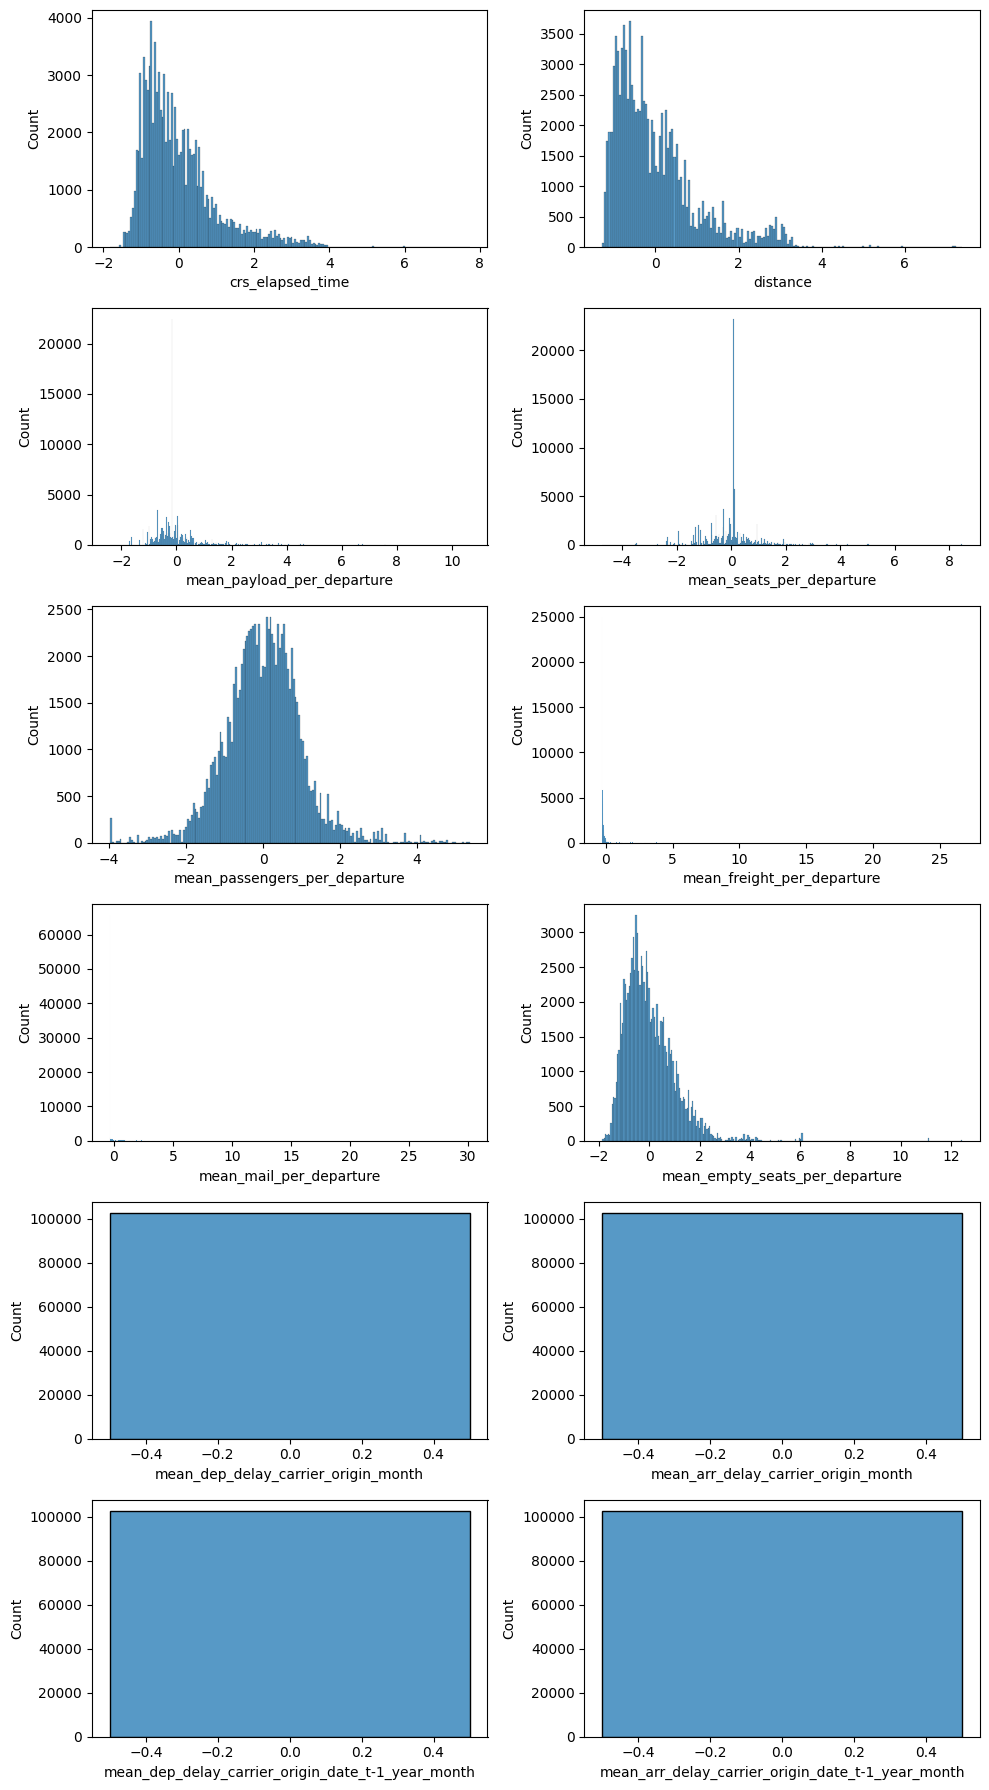

In [566]:
plot_hist(test_scaled.filter(numeric_cols))

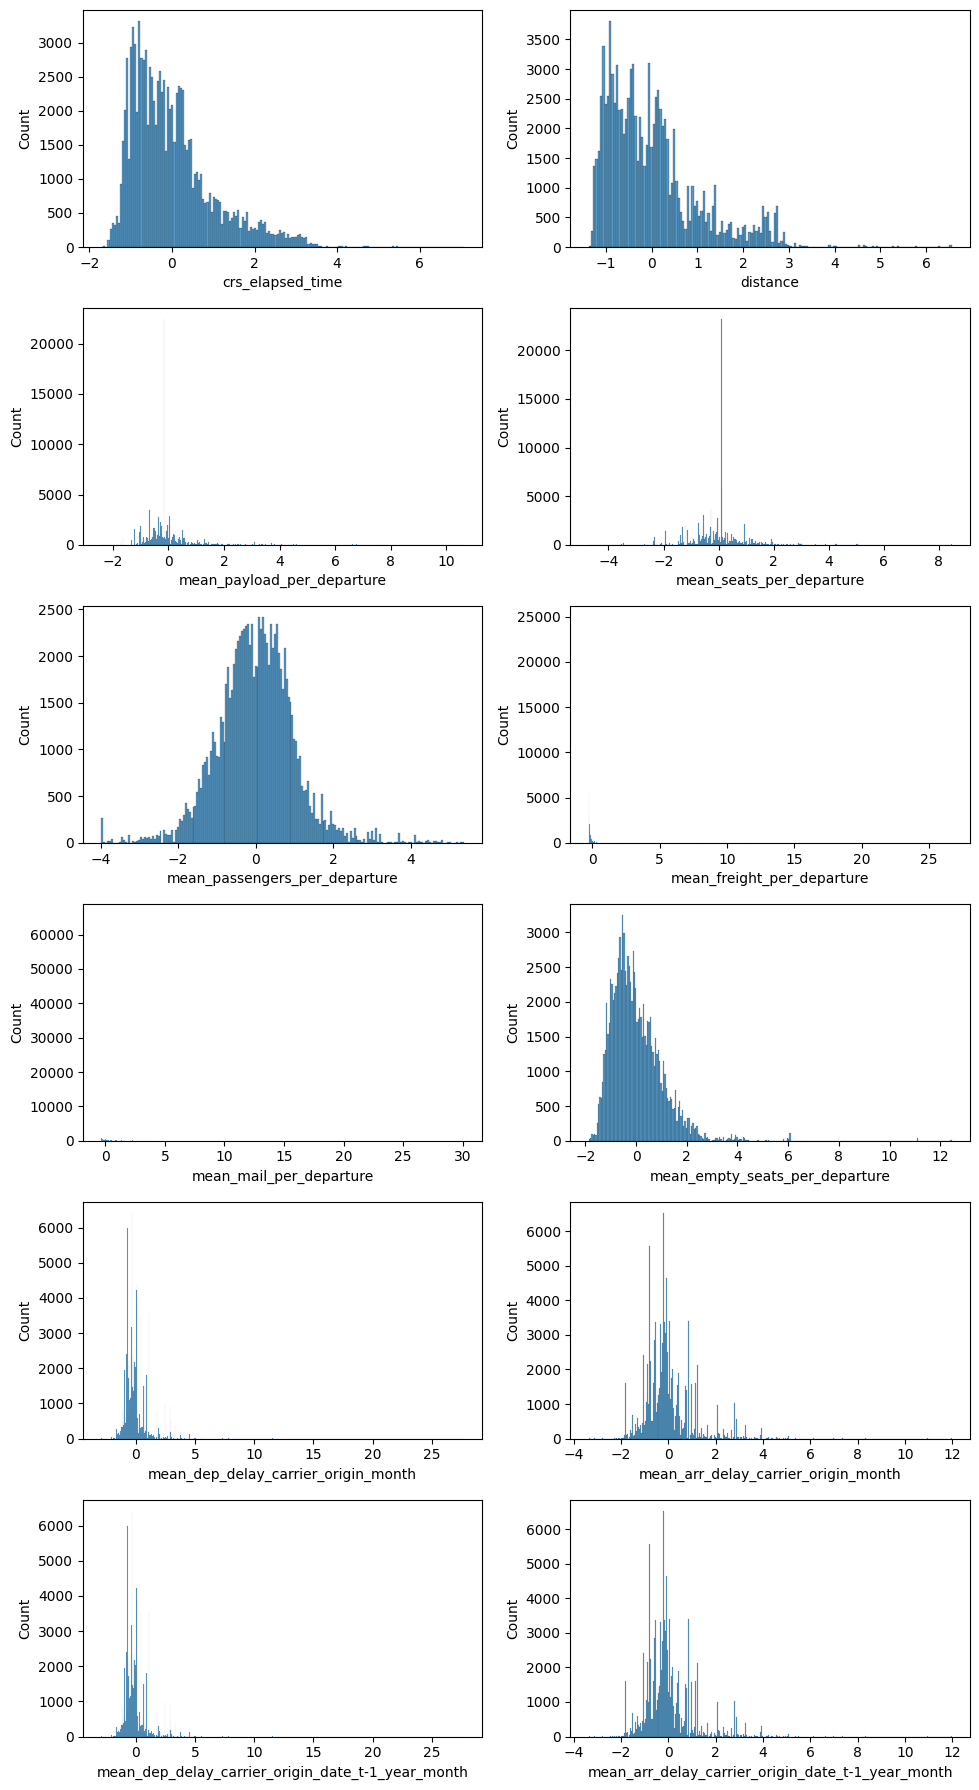

In [567]:
plot_hist(train_scaled.filter(numeric_cols))

In [568]:
train_scaled.filter(regex='mean.*delay')

mean_dep_delay_carrier_origin_month  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                                        
2019-01-06 AA          324                13930             13198                                       0.892927   
2019-01-05 UA          467                11042             11292                                      -0.424680   
           DL          5790               14869             14831                                      -0.670868   
2019-01-04 AS          359                12478             14747                                       0.379328   
2019-01-02 HA          518                12173             12758                                      -1.027914   
...                                                                                                          ...   
2019-01-07 AA          256                12892             13930                                      -0.035562   
2019-01-01 WN          2160               11423             15016                                       0.588862   
2019-01-04 DL          522                14492             11433                                      -0.289200   
2019-01-06 AA          2206               11298             13303                                       0.406462   
2019-01-04 WN          1553               14107             11292                                       0.013222   

                                                                             mean_arr_delay_carrier_origin_month  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                                        
2019-01-06 AA          324                13930             13198                                       1.178806   
2019-01-05 UA          467                11042             11292                                      -0.617052   
           DL          5790               14869             14831                                      -0.909440   
2019-01-04 AS          359                12478             14747                                      -0.583410   
2019-01-02 HA          518                12173             12758                                      -0.031664   
...                                                                                                          ...   
2019-01-07 AA          256                12892             13930                                       0.205834   
2019-01-01 WN          2160               11423             15016                                       0.322465   
2019-01-04 DL          522                14492             11433                                      -0.353874   
2019-01-06 AA          2206               11298             13303                                       0.815648   
2019-01-04 WN          1553               14107             11292                                      -0.164482   

                                                                             mean_dep_delay_carrier_origin_date_t-1_year_month  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                                                      
2019-01-06 AA          324                13930             13198                                                     0.892927   
2019-01-05 UA          467                11042             11292                                                    -0.424680   
           DL          5790               14869             14831                                                    -0.670868   
2019-01-04 AS          359                12478             14747                                                     0.379328   
2019-01-02 HA          518                12173             12758                                                    -1.027914   
...                                                                                                                        ...   
2019-01-07 AA      

# Model

In [598]:
X_train = train_scaled.drop(columns='arr_delay')
y = train_scaled['arr_delay']

## Linear regression

In [592]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
class supervised2:
    """
    * Split the data
    * Scale the data
    * Perform the following for both raw and scaled data:
        * Random search to find best parameters
        * Print model evalutation metrics: 
            * recall
            * precision
            * F1
            * AUC score
        * Plot:
            * confusion matrix
            * ROC
    Params:
    * df: Dataframe with all data and target variable as last column.
    
    Returns:
    * Best model from random search
    """
    
    def __init__(self, X, y, estimator, param_distributions, model_name):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8,random_state=0)
        self.X_train_pre = Xtrain
        self.X_test_pre =  Xtest
        self.y_train = ytrain
        self.y_test =  ytest
        self.estimator = estimator
        self.params = param_distributions
        self.model_name = model_name

    def get_best_model(self,scaled=True):
        if scaled==True:
            scaler = StandardScaler()
            self.X_train = scaler.fit_transform(self.X_train_pre)
            self.X_test = scaler.transform(self.X_test_pre)
            print('**Data has been scaled.**')
        else:
            self.X_train = self.X_train_pre
            self.X_test = self.X_test_pre
            print('**Data not scaled**')
        search = RandomizedSearchCV(self.estimator, param_distributions=self.params, n_iter=4, random_state=0,n_jobs=-2,scoring='recall')
        search.fit(self.X_train, self.y_train)
        best_model = search.best_estimator_

        y_pred = best_model.predict(self.X_test)
        y_pred_train = best_model.predict(self.X_train)
    
    
    
        # Metrics for test data

        rmse = mean_squared_error(self.y_test, y_pred, squared=False)
        mean_abs_error = mean_absolute_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)

        # Metrics for training data

        rmse_train = mean_squared_error(self.y_train, y_pred_train)
        mean_abs_error_train = mean_absolute_error(self.y_train, y_pred_train)
        r2_train = r2_score(self.y_train, y_pred_train)

        print(f'\n{self.model_name} evaluation metrics: \n\tTest data\tTraining data\t\tDifference')
        print(f'RMSE: \t\t{rmse:.2f}\t\t{rmse_train:.2f}\t\t{(rmse - rmse_train):.2f}')
        print(f'MAE: \t\t{mean_abs_error:.2f}\t\t{mean_abs_error_train:.2f}\t\t{(mean_abs_error - mean_abs_error_train):.2f}')
        print(f'R^2: \t\t{r2:.2f}\t\t{r2:.2f}\t\t{(r2 - r2_train):.2f}')
        
        print(f'Best model parameters from randomized search: {search.best_params_}')

        return best_model

In [613]:
# Example on how to call it for  Logistical regression
# param_lr = {
#     # 'penalty': ['l1','l2', 'elasticnet'],
#     # 'C': C_list,
#     'max_iter' : max_iter_list,
#     'class_weight': [None, 'balanced']
# }
from sklearn.linear_model import LinearRegression
from supervised import *
from sklearn.model_selection import train_test_split
param_lr = {
    'fit_intercept': [True, False]
}

lr = LinearRegression()
lr_attributes = supervised(X_train, y, lr, param_lr, model_name='linear regression')
best_lr = lr_attributes.get_best_model(scaled=False)

**Data not scaled**


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(



linear regression evaluation metrics: 
	Test data	Training data		Difference
RMSE: 		0.95		0.93		0.02
MAE: 		0.66		0.67		-0.00
R^2: 		0.08		0.08		0.00
Best model parameters from randomized search: {'fit_intercept': True}


In [614]:
best_lr.predict(test_scaled)

array([ 0.50073242,  0.49682617,  0.27294922, ...,  0.11230469,
       -0.16149902,  0.12255859])

In [615]:
best_lr.coef_

array([ 3.06808131e-02,  8.13724117e-02,  3.58999122e-02,  8.99436219e-03,
        1.04020192e-02, -1.25192369e-01,  2.95987885e-02,  1.97252785e-01,
        1.56691570e+11,  1.56691570e+11,  1.56691570e+11,  1.56691570e+11,
        7.45859915e+10,  7.45859915e+10,  7.45859915e+10,  7.45859915e+10,
        5.16555806e+11,  5.16555806e+11,  5.16555806e+11,  5.16555806e+11,
        5.16555806e+11,  5.16555806e+11,  5.16555806e+11,  8.57969776e+10,
        8.57969776e+10,  8.57969776e+10, -5.40817438e-01,  4.50619340e-01,
       -9.69567319e-03,  6.33574895e+12, -7.72365814e+12,  1.21678426e-02,
       -2.27831104e-04, -5.19895902e+12, -2.18757345e+12, -2.02076015e+13,
        2.18757345e+12,  2.02076015e+13])

In [624]:
test_scaled['predicted_delay'] = best_lr.predict(test_scaled)
test_scaled

origin_region_Midwest  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                          
2020-01-01 WN          5888               13891             14771                              0.0   
                       4761               13891             14831                              0.0   
                       5162               13891             14831                              0.0   
                       6152               13891             14831                              0.0   
                       1679               13891             14893                              0.0   
...                                                                                            ...   
2020-01-14 DL          546                11618             10397                              0.0   
                       549                10397             14843                              0.0   
                       550                13487             14492                              1.0   
                       555                13487             10423                              1.0   
                       569                10397             13487                              0.0   

                                                                             origin_region_Northeast  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                            
2020-01-01 WN          5888               13891             14771                                0.0   
                       4761               13891             14831                                0.0   
                       5162               13891             14831                                0.0   
                       6152               13891             14831                                0.0   
                       1679               13891             14893                                0.0   
...                                                                                              ...   
2020-01-14 DL          546                11618             10397                                1.0   
                       549                10397             14843                                0.0   
                       550                13487             14492                                0.0   
                       555                13487             10423                                0.0   
                       569                10397             13487                                0.0   

                                                                             origin_region_South  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                        
2020-01-01 WN          5888               13891             14771                            0.0   
                       4761               13891             14831                            0.0   
                       5162               13891             14831                            0.0   
                       6152               13891             14831                            0.0   
                       1679               13891             14893                            0.0   
...                                                                                          ...   
2020-01-14 DL          546                11618             10397                            0.0   
                       549                10397             14843                            1.0   
                       550                13487             14492                            0.0   
                       555                13487             10423                            0.0   
                       569                10397             13487                            1.0   

                                                                             origin_region_West 

In [616]:
# Save the model
import pickle
model = best_lr

filename = 'Silvia_best_lr.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_best_lr = pickle.load(open(filename, 'rb'))
loaded_best_lr.coef_

array([ 3.06808131e-02,  8.13724117e-02,  3.58999122e-02,  8.99436219e-03,
        1.04020192e-02, -1.25192369e-01,  2.95987885e-02,  1.97252785e-01,
        1.56691570e+11,  1.56691570e+11,  1.56691570e+11,  1.56691570e+11,
        7.45859915e+10,  7.45859915e+10,  7.45859915e+10,  7.45859915e+10,
        5.16555806e+11,  5.16555806e+11,  5.16555806e+11,  5.16555806e+11,
        5.16555806e+11,  5.16555806e+11,  5.16555806e+11,  8.57969776e+10,
        8.57969776e+10,  8.57969776e+10, -5.40817438e-01,  4.50619340e-01,
       -9.69567319e-03,  6.33574895e+12, -7.72365814e+12,  1.21678426e-02,
       -2.27831104e-04, -5.19895902e+12, -2.18757345e+12, -2.02076015e+13,
        2.18757345e+12,  2.02076015e+13])

## XGBoost

In [619]:
import xgboost as xgb
param = {
    'colsample_bytree': np.arange(0.4,1.2,.2), # [0.4, 0.6, 0.8, 1. ]
    'learning_rate': np.logspace(-2,-.5,4), # [0.01      , 0.03162278, 0.1       , 0.31622777]
    'alpha': np.arange(0,5,1),
    'max_depth': np.arange(2,6,1) # [2, 3, 4, 5]
}

estimator = xgb.XGBRegressor()
model_name = 'XGBoost'
attributes = supervised(X_train, y, estimator, param, model_name=model_name)
best_xg = attributes.get_best_model()

**Data has been scaled.**


MemoryError: Unable to allocate 19.0 MiB for an array with shape (65651, 38) and data type float64

In [ ]:
best_xg.predict(test_scaled)

C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([9.33635758e+11, 9.70511033e+11, 9.62104889e+11, ...,
       9.67235311e+11, 9.36608970e+11, 9.77454902e+11])

In [ ]:
best_lr.coef_

array([ 1.13988027e-02,  5.84803410e-02, -1.11065665e-02,  4.17642290e-03,
        9.49185483e-02,  3.16704664e-02,  2.25747352e-01,  2.51338282e-01,
        1.12123904e+10,  1.30543289e+10,  1.18606083e+10,  7.00705902e+09,
        7.98483162e+10,  8.89288943e+10,  9.21821243e+10,  2.28182806e+10,
       -2.08123039e+11, -2.09270602e+11, -1.94651982e+11, -2.06111270e+11,
       -2.07179871e+11, -2.02801140e+11, -2.12466902e+11,  3.46182728e+11,
        1.03342348e+12,  1.06683924e+12, -8.04249668e-01,  7.37090725e-01,
        1.41510102e-01, -6.37371609e+12,  7.77171240e+12, -3.56004940e-02,
        2.89987155e-02,  5.21357102e+12, -6.89266803e+11, -1.51946121e+13,
        6.89266803e+11,  1.51946121e+13])

a

# *End of Page*